In [73]:
# Importar Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("winequality-red.csv")

# Inspeccionar las primeras filas
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Resumen de los datos
df.info()

# Estadísticas descriptivas
df.describe()

# Revisar valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

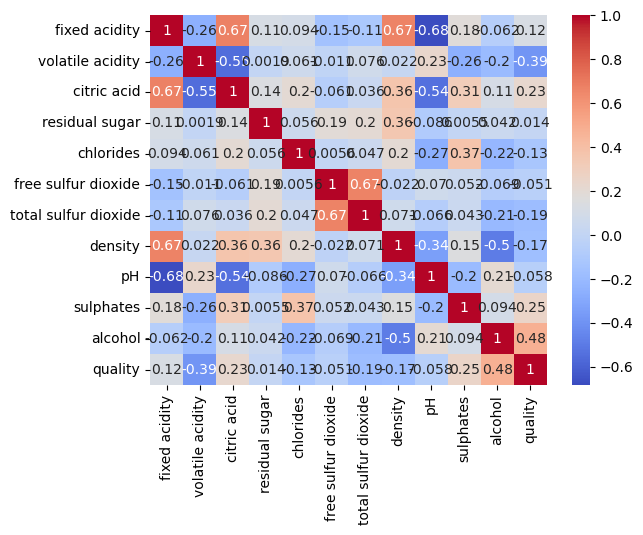

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


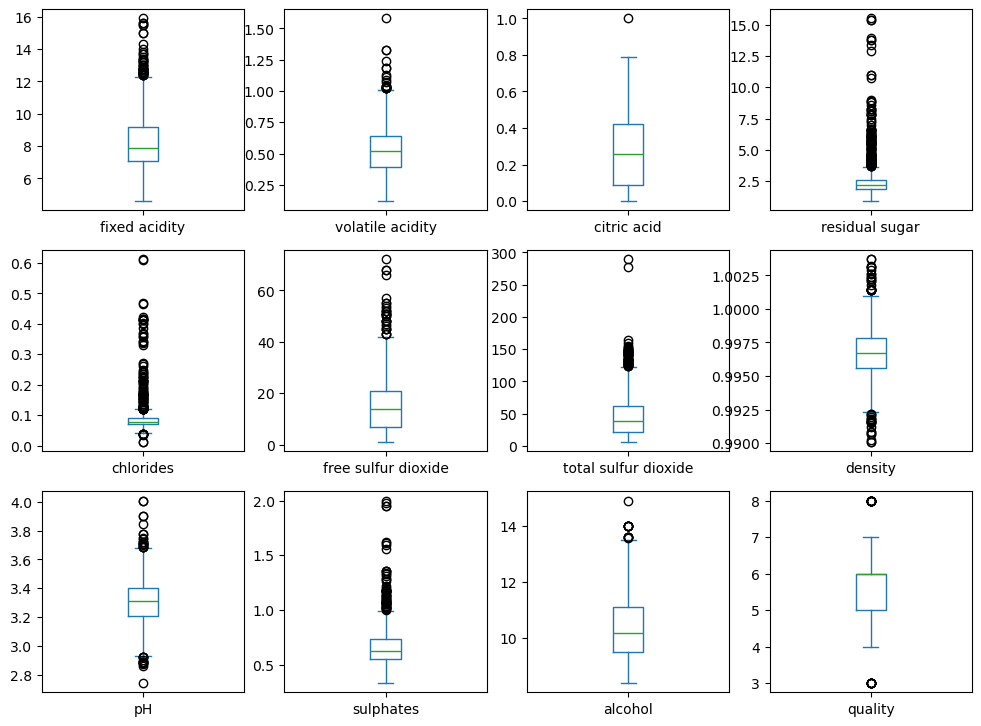

In [8]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,12), sharex=False, sharey=False)
plt.show()


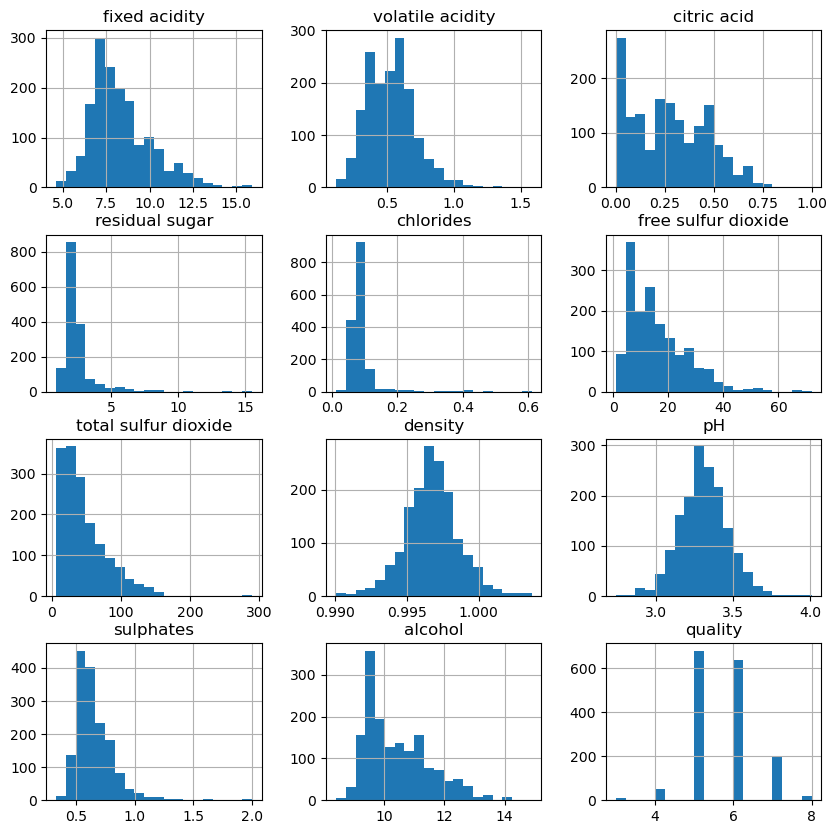

In [10]:
df.hist(bins=20, figsize=(10,10))
plt.show()


In [20]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [22]:
print(df['quality'].unique())


[5 6 7 4 8 3]


In [75]:
df['quality'] = df['quality'].apply(lambda x: 0 if x <= 5 else (1 if x == 6 else 2))
print(df['quality'].value_counts())


quality
0    744
1    638
2    217
Name: count, dtype: int64


In [79]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las 5 características más relevantes
X = df.drop('quality', axis=1)
y = df['quality']

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Ver características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')


In [83]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Verificar tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (1119, 5)
Tamaño del conjunto de prueba: (480, 5)


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
clf = DecisionTreeClassifier()

# Definir los hiperparámetros para ajustar
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar GridSearch
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Métricas de evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[152  57   4]
 [ 62 120  18]
 [  8  30  29]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       213
           1       0.58      0.60      0.59       200
           2       0.57      0.43      0.49        67

    accuracy                           0.63       480
   macro avg       0.61      0.58      0.59       480
weighted avg       0.62      0.63      0.62       480



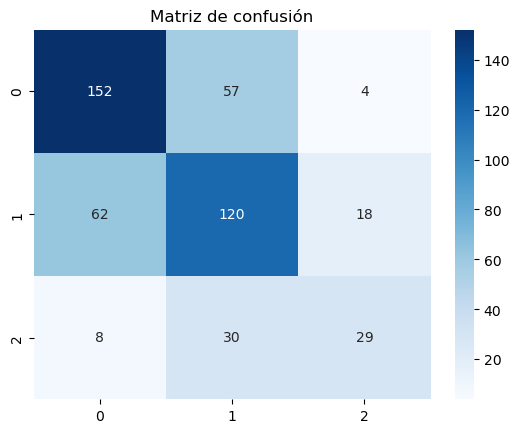

In [93]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.show()


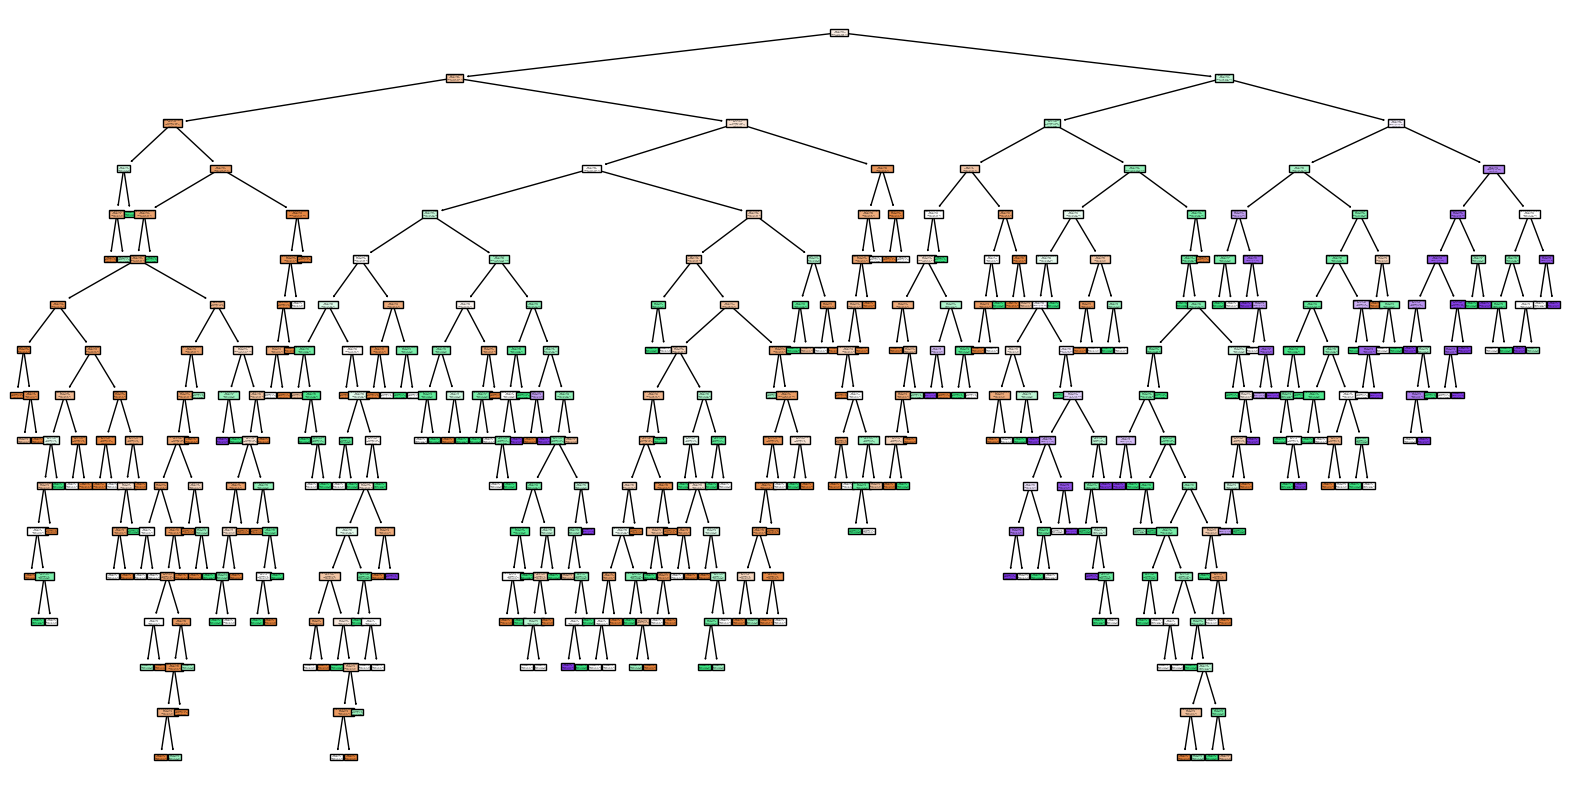

In [104]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualizar el árbol de decisiones
plt.figure(figsize=(20,10))
tree.plot_tree(grid_search.best_estimator_, filled=True, feature_names=selected_features, class_names=['bajo', 'medio', 'alto'])
plt.show()
